### Multiple Inputs - Hidden Layers

This notebook is designed to work with multiple input layers and hidden layers.

It is intended for educational purposes to demonstrate the basic structure of a neural network.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    a = sigmoid(x)
    return a * (1 - a)

In [3]:
def row(list):
    return np.array(list).reshape(1, -1)

def column(list):
    return np.array(list).reshape(-1, 1)

In [4]:
def z(prev_a, w, b):
    return prev_a @ w + b

def c(a, y):
    return sum(((a - y) ** 2)[0])

def dc_da(a, y):
    return 2 * (a - y) / a.shape[0]

In [5]:
def forward(x, w_list, b_list, y):
    z_list = [0 for _ in range(len(w_list))]
    a_list = [x] + [0 for _ in range(len(w_list))]
    for i in range(len(w_list)):
        z_list[i] = z(a_list[i], w_list[i], b_list[i])
        a_list[i + 1] = sigmoid(z_list[i])
    c_value = c(a_list[-1], y)
    return z_list, a_list, c_value

def backward(x, w_list, b_list, y, learning_rate=0.1):
    z_list, a_list, c_value = forward(x, w_list, b_list, y)
    dc_dw = [0 for _ in range(len(w_list))]
    dc_db = [0 for _ in range(len(b_list))]

    delta = dc_da(a_list[-1], y) * sigmoid_derivative(z_list[-1])

    for i in range(len(w_list) - 1, -1, -1):
        dc_dw[i] = a_list[i].T @ delta
        dc_db[i] = np.sum(delta, axis=0, keepdims=True)
        if i != 0:
            delta = (delta @ w_list[i].T) * sigmoid_derivative(z_list[i - 1])

    for i in range(len(w_list)):
        w_list[i] -= learning_rate * dc_dw[i]
        b_list[i] -= learning_rate * dc_db[i]

    c_value = forward(x, w_list, b_list, y)[2]
    return w_list, b_list, c_value

In [6]:
def hidden(x, w_list, b_list, y, alpha, iters=100, graph=False):
    c_list = []
    c_value = forward(x, w_list, b_list, y)[2]
    c_list.append(c_value)

    for _ in range(iters):
        w_list, b_list, c_value = backward(x, w_list, b_list, y, learning_rate=alpha)
        c_list.append(c_value)

    if graph:
        plt.plot(c_list)
        plt.grid()
        plt.title('Cost Function')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.yscale('log')

    _, a_value, c_value = forward(x, w_list, b_list, y)
    print('x: ', x)
    print('y: ', y)
    print('a: ', a_value[-1])
    print('Final Cost:', c_value)

x:  [[5 6]]
y:  [[0.8 0.2 0.1]]
a:  [[0.8 0.2 0.1]]
Final Cost: 3.0814879110195774e-32


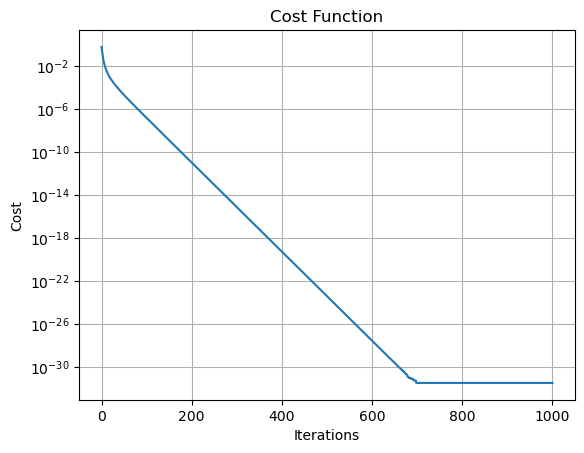

In [7]:
x = row([5, 6])
w_list = [np.array([[0.2, 0.1], [0.3, 0.4]]), np.array([[0.2, 0.1, 0.4], [0.3, 0.4, 0.5]]), np.array([[0.2, 0.1, 0.4], [0.3, 0.4, 0.5], [0.1, 0.2, -0.1]])]
b_list = [row([0.4, 0.8]), row([0.5, 0.6, 0.7]), row([0.1, 0.25, 0.1])]
y = row([0.8, 0.2, 0.1])
alpha = 1

hidden(x, w_list, b_list, y, alpha, iters=1000, graph=True)

In [8]:
def makeInputs(sizes, batch_size=1):
    x = np.random.rand(batch_size, sizes[0])
    w_list = []
    b_list = []
    for i in range(len(sizes) - 1):
        w_list.append(np.random.rand(sizes[i], sizes[i + 1]))
        b_list.append(np.random.rand(1, sizes[i + 1]))
    y = np.random.rand(batch_size, sizes[len(sizes) - 1])
    alpha = random.random()
    return x, w_list, b_list, y, alpha

x:  [[0.71979832 0.77210397 0.24319963 0.68286079 0.48445175]]
y:  [[0.29170491 0.25400943]]
a:  [[0.29170491 0.25400943]]
Final Cost: 2.296453777131576e-19


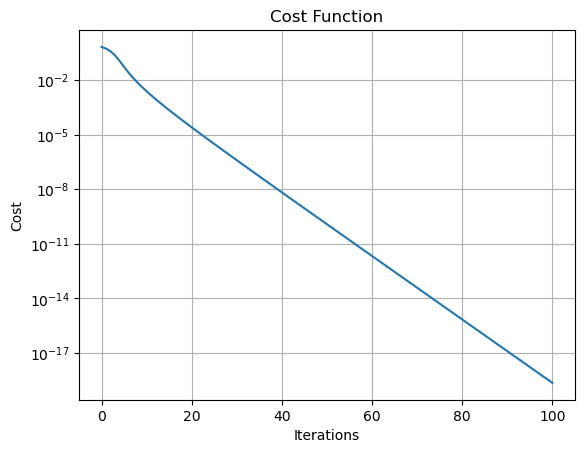

In [9]:
sizes = [5, 3, 4, 3, 2]
x, w_list, b_list, y, alpha = makeInputs(sizes)

hidden(x, w_list, b_list, y, 0.8, iters=100, graph=True)

x:  [[0.82542034 0.44363895]
 [0.11003733 0.43486407]
 [0.18881491 0.52975116]
 ...
 [0.95622805 0.45742469]
 [0.60285601 0.93221527]
 [0.83138254 0.91887459]]
y:  [[0.68131873 0.19681552]
 [0.01210821 0.18910676]
 [0.03565107 0.28063629]
 ...
 [0.91437209 0.20923734]
 [0.36343537 0.86902532]
 [0.69119692 0.8443305 ]]
a:  [[0.31993992 0.32892658]
 [0.31998353 0.32887023]
 [0.31992543 0.32901517]
 ...
 [0.31992535 0.32895457]
 [0.319703   0.32957881]
 [0.31969939 0.32957301]]
Final Cost: 0.14804798217020293


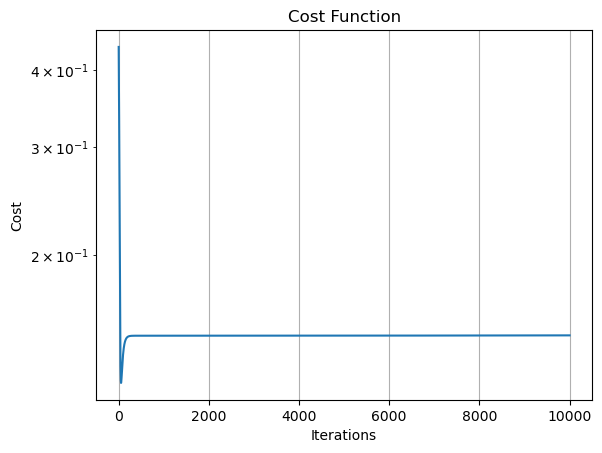

In [13]:
sizes = [2, 2, 3, 2]
x, w_list, b_list, y, alpha = makeInputs(sizes, 1000)
y = x**2

hidden(x, w_list, b_list, y, .1, iters=10000, graph=True)

In [14]:
x = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
y = x **2
_, a_value, c_value = forward(x, w_list, b_list, y)
print('x: ', x)
print('y: ', y)
print('a: ', a_value[-1])
print('Final Cost:', c_value)

x:  [[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]]
y:  [[0.01 0.04]
 [0.09 0.16]
 [0.25 0.36]]
a:  [[0.32012673 0.32850317]
 [0.31999333 0.32882942]
 [0.31987124 0.32913364]]
Final Cost: 0.17941267108374465


In [20]:
def train(x, y, w_list, b_list, alpha=0.1, iters=100, batch_size=32, graph=False):
    c_list = []

    for _ in range(iters):
        indices = np.arange(x.shape[0])
        np.random.shuffle(indices)
        x, y = x[indices], y[indices]

        for start in range(0, x.shape[0], batch_size):
            end = start + batch_size
            x_batch = x[start:end]
            y_batch = y[start:end]

            w_list, b_list, c_val = backward(x_batch, w_list, b_list, y_batch, learning_rate=alpha)

        c_list.append(c_val)

    if graph:
        import matplotlib.pyplot as plt
        plt.plot(c_list)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        plt.title("Training Loss")
        plt.show()

    return w_list, b_list

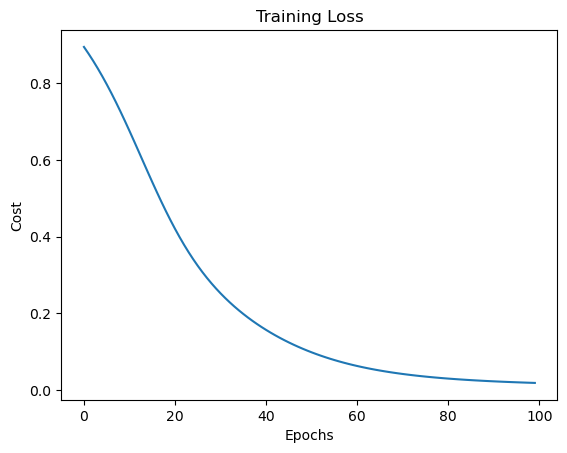

([array([[0.33676391, 0.79054468],
         [0.59498776, 0.34531415]]),
  array([[0.22747181, 0.16928109, 0.26849844],
         [0.3419742 , 1.03711583, 0.53739633]]),
  array([[ 0.02162568, -0.55141362],
         [-0.51516407, -0.72894676],
         [ 0.39343654, -0.29789374]])],
 [array([[0.08415253, 0.477794  ]]),
  array([[0.75428612, 0.54909975, 0.40226792]]),
  array([[ 0.00809099, -0.6236212 ]])])

In [21]:
sizes = [2, 2, 3, 2]
x, w_list, b_list, y, alpha = makeInputs(sizes)
y = x**2

train(x, y, w_list, b_list, graph=True)

In [22]:
x = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
y = x **2
_, a_value, c_value = forward(x, w_list, b_list, y)
print('x: ', x)
print('y: ', y)
print('a: ', a_value[-1])
print('Final Cost:', c_value)

x:  [[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]]
y:  [[0.01 0.04]
 [0.09 0.16]
 [0.25 0.36]]
a:  [[0.47445617 0.13884592]
 [0.4740162  0.13739303]
 [0.47364511 0.13609591]]
Final Cost: 0.22549005230087005
